!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

**It is necessary to change runtime type to GPU if not using '--skip-torch-cuda-test --no-half --use-cpu all' in '!python launch.py'**

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

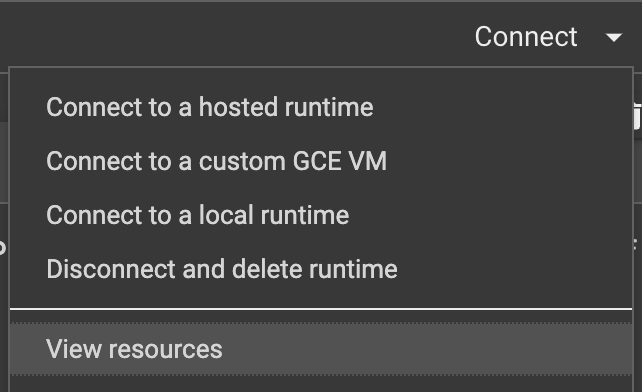

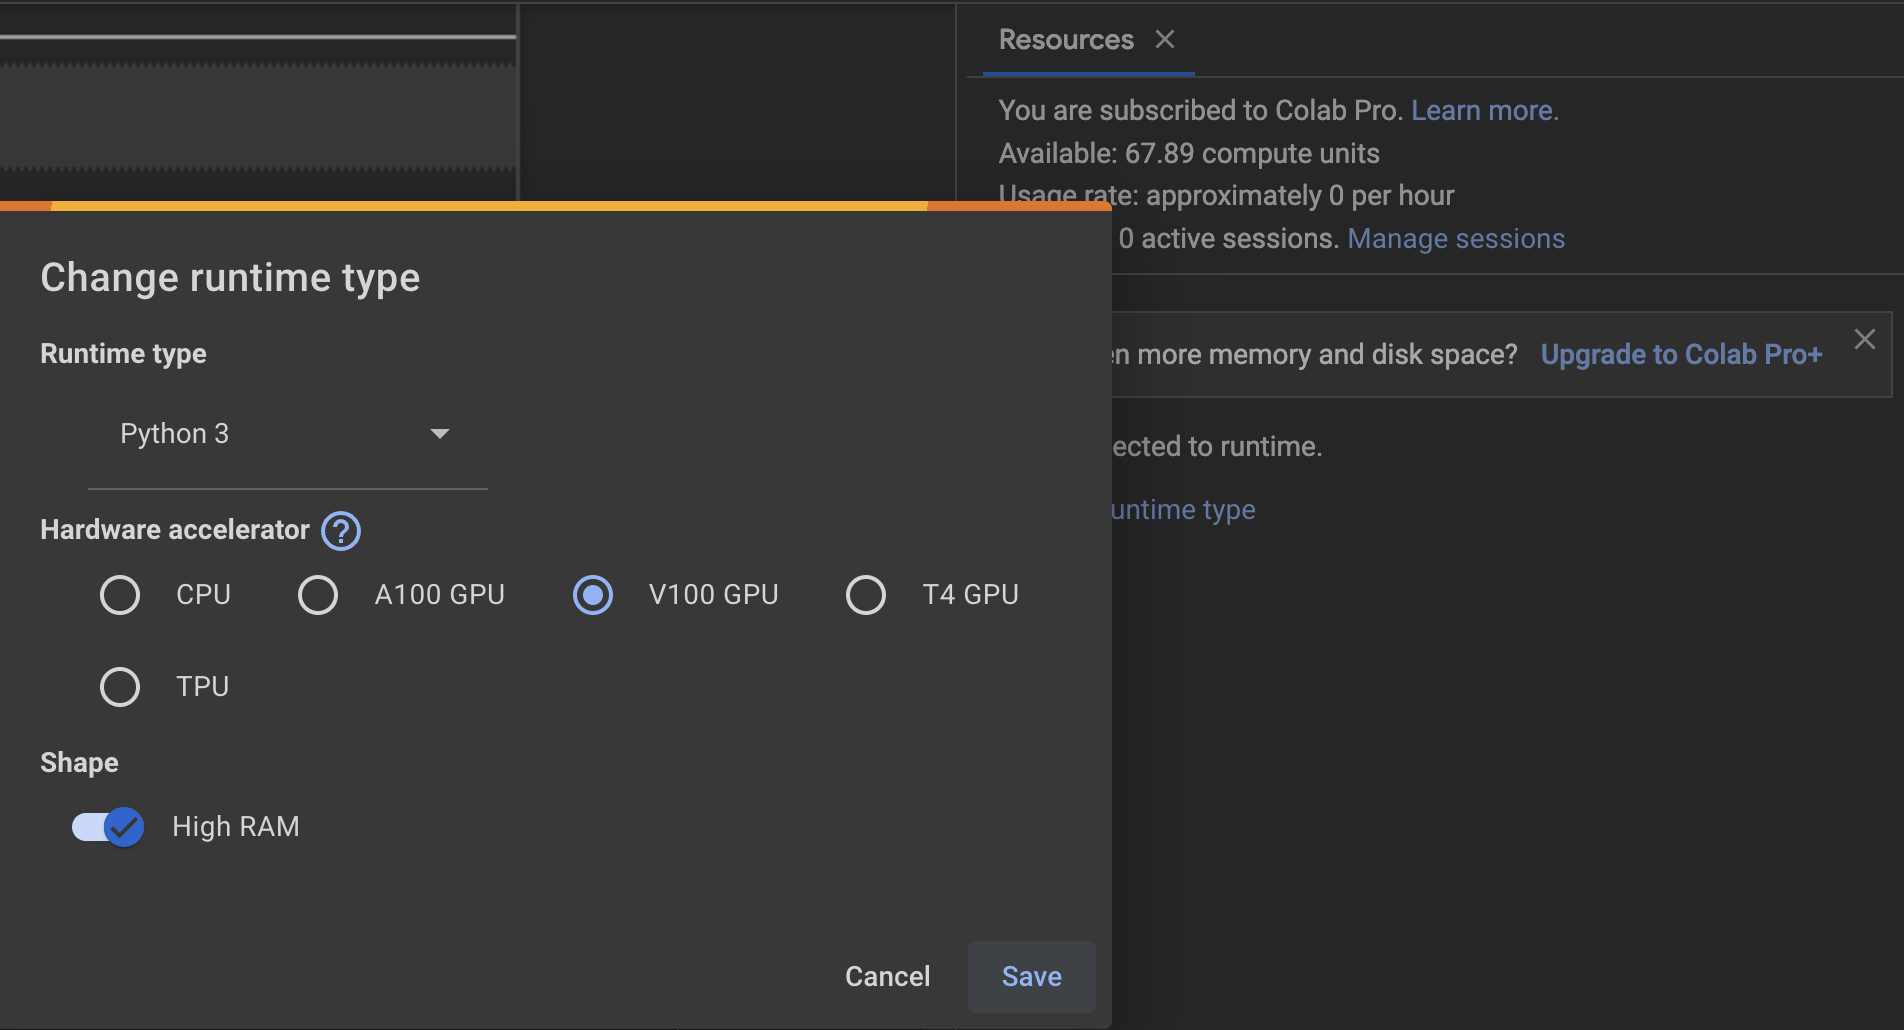

In [ ]:
%cd /content

%env TF_CPP_MIN_LOG_LEVEL=1

!apt -y update -qq
!wget https://github.com/camenduru/gperftools/releases/download/v1.0/libtcmalloc_minimal.so.4 -O /content/libtcmalloc_minimal.so.4
%env LD_PRELOAD=/content/libtcmalloc_minimal.so.4

!apt -y install -qq aria2 libcairo2-dev pkg-config python3-dev
!pip install -q torch==2.0.1+cu118 torchvision==0.15.2+cu118 torchaudio==2.0.2+cu118 torchtext==0.15.2 torchdata==0.6.1 --extra-index-url https://download.pytorch.org/whl/cu118 -U
!pip install -q xformers==0.0.20 triton==2.0.0 gradio_client==0.2.7 -U
!pip install httpx==0.24.1

!git clone -b v2.4 https://github.com/camenduru/stable-diffusion-webui
!git clone https://huggingface.co/embed/negative /content/stable-diffusion-webui/embeddings/negative
!git clone https://huggingface.co/embed/lora /content/stable-diffusion-webui/models/Lora/positive
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/embed/upscale/resolve/main/4x-UltraSharp.pth -d /content/stable-diffusion-webui/models/ESRGAN -o 4x-UltraSharp.pth
!wget https://raw.githubusercontent.com/camenduru/stable-diffusion-webui-scripts/main/run_n_times.py -O /content/stable-diffusion-webui/scripts/run_n_times.py
!git clone -b v2.4 https://github.com/camenduru/deforum-for-automatic1111-webui /content/stable-diffusion-webui/extensions/deforum-for-automatic1111-webui
!git clone -b v2.4 https://github.com/camenduru/stable-diffusion-webui-images-browser /content/stable-diffusion-webui/extensions/stable-diffusion-webui-images-browser
!git clone -b v2.4 https://github.com/camenduru/stable-diffusion-webui-huggingface /content/stable-diffusion-webui/extensions/stable-diffusion-webui-huggingface
!git clone -b v2.4 https://github.com/camenduru/sd-civitai-browser /content/stable-diffusion-webui/extensions/sd-civitai-browser
!git clone -b v2.4 https://github.com/camenduru/sd-webui-additional-networks /content/stable-diffusion-webui/extensions/sd-webui-additional-networks
!git clone -b v2.4 https://github.com/camenduru/sd-webui-tunnels /content/stable-diffusion-webui/extensions/sd-webui-tunnels
!git clone -b v2.4 https://github.com/camenduru/batchlinks-webui /content/stable-diffusion-webui/extensions/batchlinks-webui
!git clone -b v2.4 https://github.com/camenduru/stable-diffusion-webui-catppuccin /content/stable-diffusion-webui/extensions/stable-diffusion-webui-catppuccin
!git clone -b v2.4 https://github.com/camenduru/stable-diffusion-webui-rembg /content/stable-diffusion-webui/extensions/stable-diffusion-webui-rembg
!git clone -b v2.4 https://github.com/camenduru/stable-diffusion-webui-two-shot /content/stable-diffusion-webui/extensions/stable-diffusion-webui-two-shot
!git clone -b v2.4 https://github.com/camenduru/sd-webui-aspect-ratio-helper /content/stable-diffusion-webui/extensions/sd-webui-aspect-ratio-helper
!git clone -b v2.4 https://github.com/camenduru/asymmetric-tiling-sd-webui /content/stable-diffusion-webui/extensions/asymmetric-tiling-sd-webui
%cd /content/stable-diffusion-webui
!git reset --hard
!git -C /content/stable-diffusion-webui/repositories/stable-diffusion-stability-ai reset --hard

# Your SD model
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/cyruslau/meinamix_meinaV11/resolve/main/meinamix_meinaV11.safetensors -d /content/stable-diffusion-webui/models/Stable-diffusion -o meinamix_meinaV11.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/cyruslau/meinapastel_v6Pastel/resolve/main/meinapastel_v6Pastel.safetensors -d /content/stable-diffusion-webui/models/Stable-diffusion -o meinapastel_v6Pastel.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/cyruslau/cetusMix_v4/resolve/main/cetusMix_v4.safetensors -d /content/stable-diffusion-webui/models/Stable-diffusion -o cetusMix_v4.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/cyruslau/counterfeitV30_v30/resolve/main/counterfeitV30_v30.safetensors -d /content/stable-diffusion-webui/models/Stable-diffusion -o counterfeitV30_v30.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/cyruslau/mechaXL_v10/resolve/main/mechaXL_v10.safetensors -d /content/stable-diffusion-webui/models/Stable-diffusion -o mechaXL_v10.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/cyruslau/quadruped-mechasV2/resolve/main/quadruped%20mechasV2.safetensors -d /content/stable-diffusion-webui/models/Lora -o quadruped-mechasV2.safetensors

!sed -i -e '''/from modules import launch_utils/a\import os''' /content/stable-diffusion-webui/launch.py
!sed -i -e '''/        prepare_environment()/a\        os.system\(f\"""sed -i -e ''\"s/dict()))/dict())).cuda()/g\"'' /content/stable-diffusion-webui/repositories/stable-diffusion-stability-ai/ldm/util.py""")''' /content/stable-diffusion-webui/launch.py
!sed -i -e 's/\["sd_model_checkpoint"\]/\["sd_model_checkpoint","sd_vae","CLIP_stop_at_last_layers"\]/g' /content/stable-diffusion-webui/modules/shared.py

!python launch.py --listen --xformers --enable-insecure-extension-access --theme dark --gradio-queue --multiple
# --no-half prevents the NaNs, do any (empty) txt2img before to do img2img fixes it

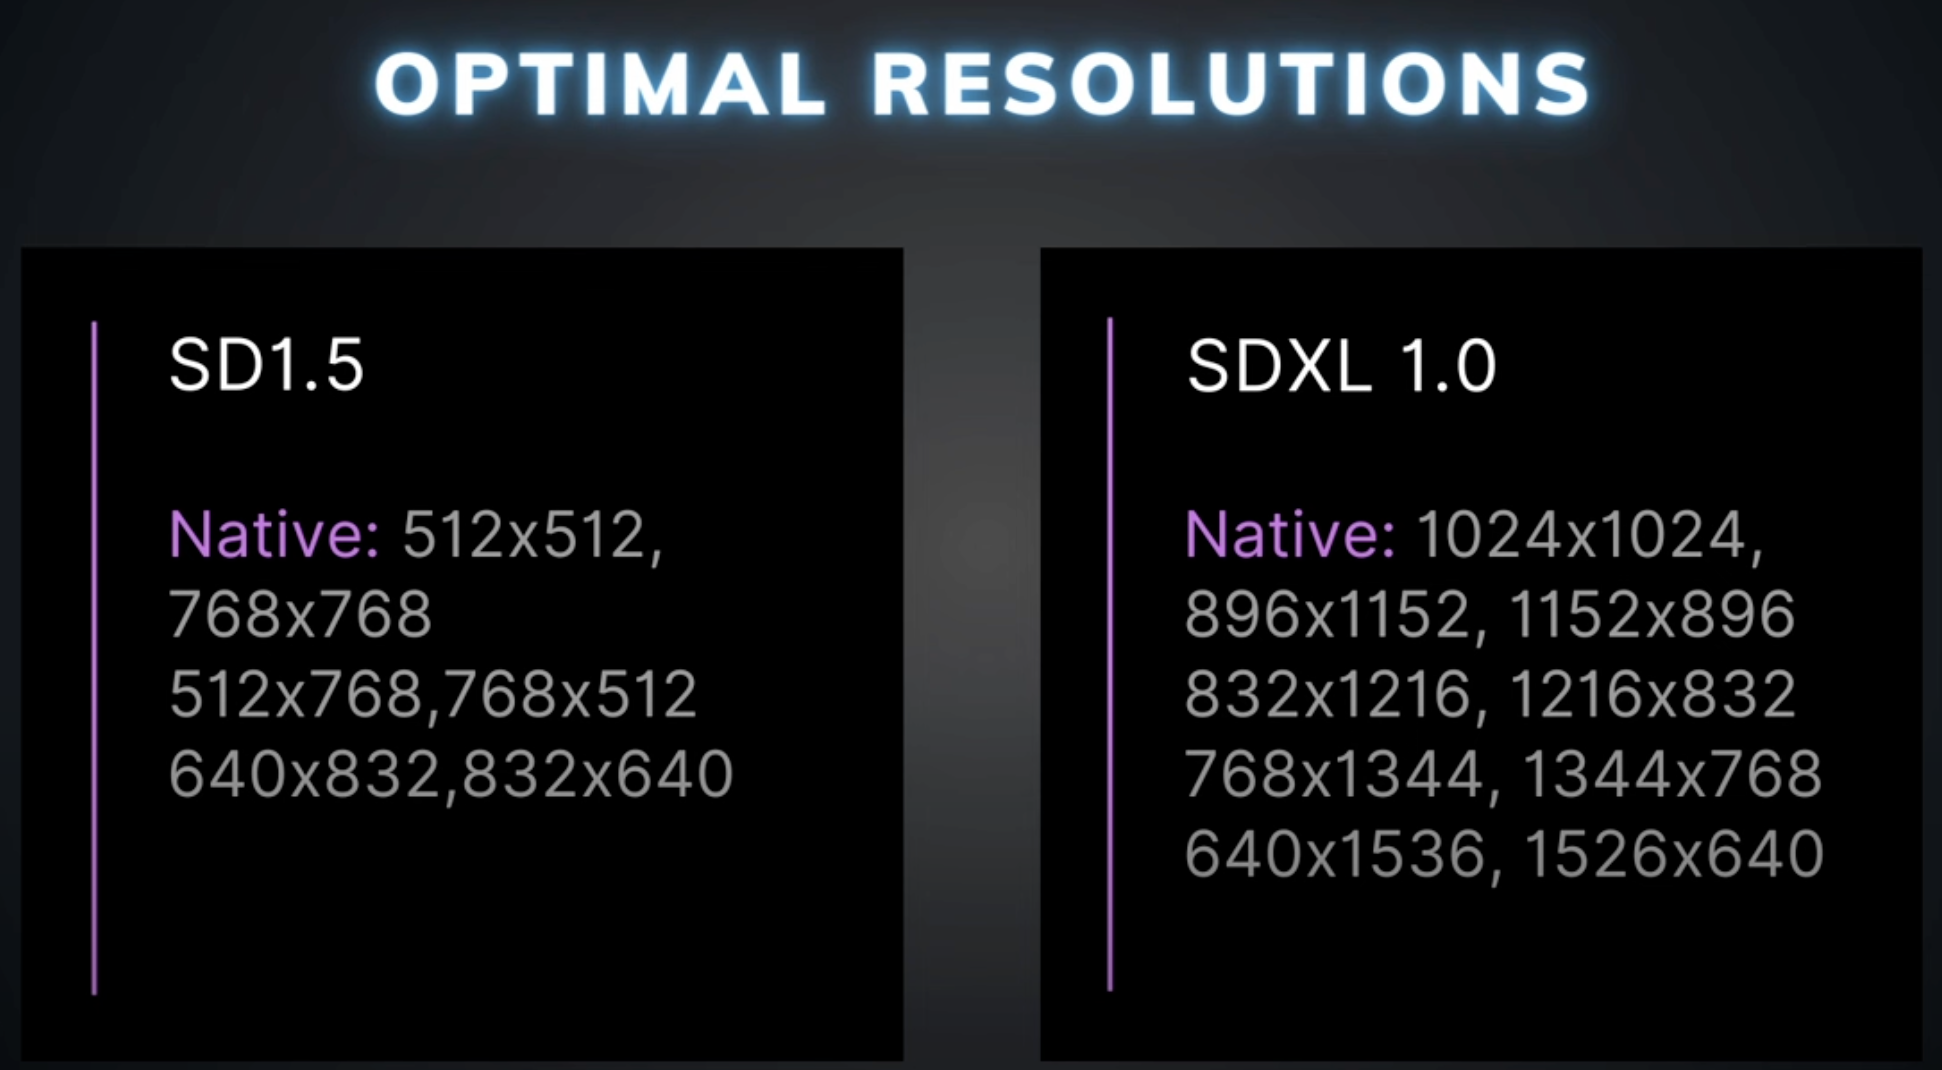